#Evaluación Final - Diplomado Data Science Duoc UC

# Módulo: Machine Learning

A continuación, aplicarás lo aprendido con el uso de las librerías de Python desde fuentes de datos proporcionadas por el relator.

**Recuerda almacenar una copia de este Jupyter Notebook en tu Google Drive para poder ejecutar los bloques de código.**


---
Proponga al menos 6 preguntas que podamos responder con el análisis exploratorio previo a la construcción de un modelo de Machine Learning, que permita hacer una proyección (regresión) o una clasificación de acuerdo al aspecto elegido de los datos.

Detecte correlaciones relevantes que permitan hacer más óptimo el modelo de ML en combinación con los algoritmos e hiperparámetros adecuados de acuerdo a la solución planteada.

Elabore un informe en Jupyter Notebook haciendo uso de cuadros de texto y cuadros de código para robustecer la solución planteada.


Datos: disponibles en el enlace en una de las celdas de este notebook.


---



**Recuerda hacer uso de todo lo aprendido! mientras más cosas descubras de los datos, más robusto será tu análisis.** 

In [ ]:
!wget https://www.dropbox.com/s/xitvmn3jdb1r36i/PlayStore.csv

--2022-08-21 23:01:23--  https://www.dropbox.com/s/xitvmn3jdb1r36i/PlayStore.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.71.18, 2620:100:6021:18::a27d:4112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.71.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/xitvmn3jdb1r36i/PlayStore.csv [following]
--2022-08-21 23:01:23--  https://www.dropbox.com/s/raw/xitvmn3jdb1r36i/PlayStore.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc9054bf45e081e873624856ae64.dl.dropboxusercontent.com/cd/0/inline/Bresw6D2-3ycwx2Ldgqnlr-EudMVz6D4vsejemIEA4iwBZSMK_i2aFADVv0tfTv7wuUnT8wOfPxoa5f-arbveAQhQZhitc2FIYiMgzUNxZhIp66rl21OUA6G9NcpenMwtE5Tg9M8zJnlST6LDU87DVXkjDjutN4cZj0v7bz7gx6E5Q/file# [following]
--2022-08-21 23:01:24--  https://uc9054bf45e081e873624856ae64.dl.dropboxusercontent.com/cd/0/inline/Bresw6D2-3ycwx2Ldgqnlr-EudMVz6D4vsejemIEA4iwBZSMK_i2aFADVv0tfT

In [ ]:
# Importamos las librerías necesarias.
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
# Preparación de los datos
from sklearn import preprocessing

In [ ]:
# Herramienta para dividir los datos en prueba y entrenamiento 
from sklearn.model_selection import RepeatedKFold,train_test_split

In [ ]:
# Import de los modelos
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor 

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Importa las metricas
from sklearn import metrics

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Análisis Exploratorio de Datos

In [ ]:
dataframe = pd.read_csv("PlayStore.csv", sep = ";")

In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9141 entries, 0 to 9140
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   App            9141 non-null   object
 1   Categoría      9141 non-null   object
 2   Valoración     7725 non-null   object
 3   Comentarios    9141 non-null   int64 
 4   Tamaño(M)      9141 non-null   object
 5   Descargas      9141 non-null   object
 6   Tipo           9141 non-null   object
 7   Precio         9141 non-null   object
 8   Clasificación  9141 non-null   object
dtypes: int64(1), object(8)
memory usage: 642.9+ KB


In [ ]:
dataframe

,App,Categoría,Valoración,Comentarios,Tamaño(M),Descargas,Tipo,Precio,Clasificación
0,AJ Styles HD Wallpapers,ARTE Y DISEÑO,"4,8",48,25,"5,000 aprox.",Gratis,0,Todo público
1,I Creative Idea,ARTE Y DISEÑO,"4,7",353,"4,2","10,000 aprox.",Gratis,0,Adolescentes
2,Infinite Painter,ARTE Y DISEÑO,"4,1",36815,29,"1,000,000 aprox.",Gratis,0,Todo público
3,FlipaClip - Cartoon animation,ARTE Y DISEÑO,"4,3",194216,39,"5,000,000 aprox.",Gratis,0,Todo público
4,Text on Photo - Fonteee,ARTE Y DISEÑO,"4,4",13880,28,"1,000,000 aprox.",Gratis,0,Todo público
...,...,...,...,...,...,...,...,...,...
9136,BPme - Mobile Fuel Payment & BP Driver Rewards...,VIAJES,3,69,31,"10,000 aprox.",Gratis,0,Todo público
9137,Gormey: Find Best Restaurants,VIAJES,"4,3",34,"7,6","1,000 aprox.",Gratis,0,Todo público
9138,NTES,VIAJES,"4,3",165299,"5,4","10,000,000 aprox.",Gratis,0,Todo público
9139,Urbanspoon Restaurant Reviews,VIAJES,"4,2",35560,13,"5,000,000 aprox.",Gratis,0,Todo público


In [ ]:
dataframe["App"].value_counts()

ROBLOX                                      9
Candy Crush Saga                            7
8 Ball Pool                                 7
Temple Run 2                                6
Helix Jump                                  6
                                           ..
Color by Number - Draw Sandbox Pixel Art    1
fi                                          1
European Union Simulator                    1
Battle of Zombies: Clans War                1
Urbanspoon Restaurant Reviews               1
Name: App, Length: 8430, dtype: int64

In [ ]:
dataframe["Clasificación"].value_counts()

Todo público          7415
Adolescentes           986
Mayores de 17 años     405
Mayores de 10 años     331
Sólo adultos             2
Sin clasificación        2
Name: Clasificación, dtype: int64

In [ ]:
dataframe["Categoría"].value_counts()

FAMILIA                   1770
JUEGO                     1051
HERRAMIENTAS               738
MÉDICO                     433
NEGOCIO                    400
PERSONALIZACIÓN            356
ESTILO DE VIDA             349
DEPORTES                   310
FINANCIERAS                306
PRODUCTIVIDAD              303
SALUD Y BELLEZA            265
COMUNICACIÓN               264
FOTOGRAFÍA                 253
NOTICIAS                   215
DATOS                      212
SOCIAL                     209
COMPRAS                    201
LIBROS Y REFRERENCIAS      197
VIAJES                     192
REPRODUCTORES DE VIDEO     129
EDUCACIÓN                  124
MAPAS Y NAVEGACIÓN         108
ENTRETENIMIENTO            102
COMIDA Y BEBIDA            100
LIBRERIAS                   82
VEHICULOS                   75
CASA Y HOGAR                68
ARTE Y DISEÑO               65
EVENTOS                     57
CLIMA                       57
PADRES                      53
HISTORIETAS                 50
BELLEZA 

In [ ]:
dataframe["Tipo"].value_counts()

Gratis    8417
Pago       724
Name: Tipo, dtype: int64

In [ ]:
dataframe["Tamaño(M)"].isnull().sum()

0

In [ ]:
dataframe.count()

App              9141
Categoría        9141
Valoración       7725
Comentarios      9141
Tamaño(M)        9141
Descargas        9141
Tipo             9141
Precio           9141
Clasificación    9141
dtype: int64

In [ ]:
dataframe.isnull().sum()

App                 0
Categoría           0
Valoración       1416
Comentarios         0
Tamaño(M)           0
Descargas           0
Tipo                0
Precio              0
Clasificación       0
dtype: int64

## Planteamiento de sus preguntas 

### Pregunta 1

Si realizo una app con categoría "Todo público" ¿tendré mayor descarga que las demás clasificaciónes?

### Pregunta 2

¿Una aplicación gratuita tendrá más descargas que una aplicación de pago?

### Pregunta 3

¿La cantidad de comentarios es directamente proporcional a las descargas?

### Pregunta 4

¿La categoría es afectada por la Clasificación y al Tipo de la aplicación?

### Pregunta 5

¿El Tamaño(M) de la aplicación tiene relación con la Categoría y la Cantidad de Descargas?

# Propuesta de limpieza


In [ ]:
dataframe["App"] = dataframe["App"].astype("string")

Con este tipo de limpieza cambio el tipo de dato "object" a "string" de la variable "App".

In [ ]:
dataframe["Categoría"] = dataframe["Categoría"].astype("string")

Con este tipo de limpieza cambio el tipo de dato "object" a "string" de la variable "Categoría".

In [ ]:
dataframe["Valoración"] = dataframe["Valoración"].astype("string")

Con este tipo de limpieza cambio el tipo de dato "object" a "string" de la variable "Valoración".

In [ ]:
dataframe["Tamaño(M)"] = dataframe["Tamaño(M)"].astype("string")

Con este tipo de limpieza cambio el tipo de dato "object" a "string" de la variable "Tamaño(M)".

In [ ]:
dataframe["Descargas"] = dataframe["Descargas"].astype("string")

Con este tipo de limpieza cambio el tipo de dato "object" a "string" de la variable "Descargas".

In [ ]:
dataframe["Tipo"] = dataframe["Tipo"].astype("string")

Con este tipo de limpieza cambio el tipo de dato "object" a "string" de la variable "Tipo".

In [ ]:
dataframe["Precio"] = dataframe["Precio"].astype("string")

Con este tipo de limpieza cambio el tipo de dato "object" a "string" de la variable "Precio".

In [ ]:
dataframe["Clasificación"] = dataframe["Clasificación"].astype("string")

Con este tipo de limpieza cambio el tipo de dato "object" a "string" de la variable "Clasificación".

In [ ]:
def categoria_num(row) -> int:
  if row["Categoría"] in w:
    return (w.index(row["Categoría"]) + 1)

w: list = list(dataframe["Categoría"].unique())

dataframe["Categoría (int)"] = dataframe.apply(categoria_num, axis = 1)
dataframe["Categoría (int)"] = dataframe["Categoría (int)"].astype(int)

Este tipo de limpieza agrega un número a la categoría y lo pone en una nueva columna.

In [ ]:
def replace_dot_by_comma(row) -> int:
  if pd.isnull(row["Valoración"]):
    return np.nan
  else:
    return row["Valoración"].replace(",", ".")

dataframe["Valoración (float type)"] = dataframe.apply(replace_dot_by_comma, axis = 1)
dataframe["Valoración (float type)"] = dataframe["Valoración (float type)"].astype(float)

Con este tipo de limpieza reemplazamos la separación de decimales de coma a punto, guardando estos datos en una nueva columna llamada "Valoración (float type), aunque mantiene los valores nulos.

In [ ]:
def remove_null_valoracion(row) -> float:
    '''
    function to check if the "age" is null and replace wth the mean from 
    the mean "age" dataframe
    '''
    if pd.isnull(row['Valoración (float type)']):
        return mean_valoracion[row['Categoría']]
    else:
        return row['Valoración (float type)']

mean_valoracion: float = dataframe.groupby(["Categoría"])["Valoración (float type)"].mean().astype(float)

dataframe["Valoración (float type)"] = dataframe.apply(remove_null_valoracion, axis = 1)

Con esta limpieza reemplazamos los valores nulos por el promedio.

In [ ]:
dataframe["Tamaño(M) (float type)"] = [x.replace(",", ".") for x in dataframe["Tamaño(M)"]]
dataframe["Tamaño(M) (float type)"] = dataframe["Tamaño(M) (float type)"].astype(float)

Con esta limpieza se reemplaza los separadores de decimales (se reemplazan las comas por puntos) y esta modificación se guarda en una nueva columna llamada "Tamaño(M) (float type)".

In [ ]:
dataframe["Tamaño(M) (int type)"] = dataframe["Tamaño(M) (float type)"].round().astype(int)

Acá creo una columna del tamaño, a diferencia del otro tamaño, es que en esta columna redondea los valores hasta dejar sin decimales.

In [ ]:
def dejar_solo_cifras(txt) -> int:
  return str("").join(c for c in txt if c.isdigit())

dataframe["Cantidad descargas"] = dataframe["Descargas"].map(dejar_solo_cifras)
dataframe["Cantidad descargas"] = [x.replace(",", "") for x in dataframe["Cantidad descargas"]]
dataframe["Cantidad descargas"] = dataframe["Cantidad descargas"].astype(int)

Con este tipo de limpieza, se elimina los caracteres que tiene la columna, dejando únicamente los números, y, además, se elimina el separador de miles de la columna "Descargas" y los cambios realizados se guardan en una nueva columna nombrada "Cantidad descargas" y, además, se cambia el formato de esta nueva columna de "string" a "int".

In [ ]:
def tipo_num(row) -> int:
  if row["Tipo"] in w:
    return w.index(row["Tipo"])

w: list = list(dataframe["Tipo"].unique())

dataframe["Tipo (int)"] = dataframe.apply(tipo_num, axis = 1)
dataframe["Tipo (int)"] = dataframe["Tipo (int)"].astype(int)
dataframe["Tipo"]

0       Gratis
1       Gratis
2       Gratis
3       Gratis
4       Gratis
         ...  
9136    Gratis
9137    Gratis
9138    Gratis
9139    Gratis
9140    Gratis
Name: Tipo, Length: 9141, dtype: string

In [ ]:
dataframe["Precio (float type)"] = [x.replace(",", ".") for x in dataframe["Precio"]]
dataframe["Precio (float type)"] = dataframe["Precio (float type)"].astype(float)

Con este tipo de limpieza, se reemplaza el separador de decimales (de una coma a un punto) de la columna "Precio" y los cambios realizados se guardan en una nueva columna nombrada "Precio (float type)" y, además, se cambia el formato de esta nueva columna de "string" a "float".

In [ ]:
def clasificacion_num(row) -> int:
  if row["Clasificación"] == str("Todo público"):
    return int(0)
  elif row["Clasificación"] == str("Adolescentes"):
    return int(12)
  elif row["Clasificación"] == str("Mayores de 17 años"):
    return int(17)
  elif row["Clasificación"] == str("Mayores de 10 años"):
    return int(10)
  elif row["Clasificación"] == str("Sólo adultos"):
    return int(18)
  else:
    return int(-1)

dataframe["Clasificación edad"] = dataframe.apply(clasificacion_num, axis = 1)
dataframe["Clasificación edad"] = dataframe["Clasificación edad"].astype(int)

Se crea una nueva columna llamada "Clasificación edad" para guardar numéricamente los datos de la columna "Clasificación".

1. Si la clasificación es "Todo público" se pone un 0 en "Clasificación edad".
2. Si la clasificación es "Adolescentes" se pone un 12 en "Clasificación edad".
3. Si la clasificación es "Mayores de 17 años" se pone un 17 en "Clasificación edad".
4. Si la clasificación es "Mayores de 10 años" se pone un 10 en "Clasificación edad".
5. Si la clasificación es "Sólo adultos" se pone un 18 en "Clasificación edad".
6. En cualquier otro caso se pone un -1 en "Clasificación edad".

En el caso de "Adolescentes" se consideró la información del Ministerio de Salud de Colombia (https://www.minsalud.gov.co/proteccionsocial/Paginas/cicloVida.aspx)

In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9141 entries, 0 to 9140
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   App                      9141 non-null   string 
 1   Categoría                9141 non-null   string 
 2   Valoración               7725 non-null   string 
 3   Comentarios              9141 non-null   int64  
 4   Tamaño(M)                9141 non-null   string 
 5   Descargas                9141 non-null   string 
 6   Tipo                     9141 non-null   string 
 7   Precio                   9141 non-null   string 
 8   Clasificación            9141 non-null   string 
 9   Categoría (int)          9141 non-null   int64  
 10  Valoración (float type)  9141 non-null   float64
 11  Tamaño(M) (float type)   9141 non-null   float64
 12  Tamaño(M) (int type)     9141 non-null   int64  
 13  Cantidad descargas       9141 non-null   int64  
 14  Tipo (int)              

## Correlaciones

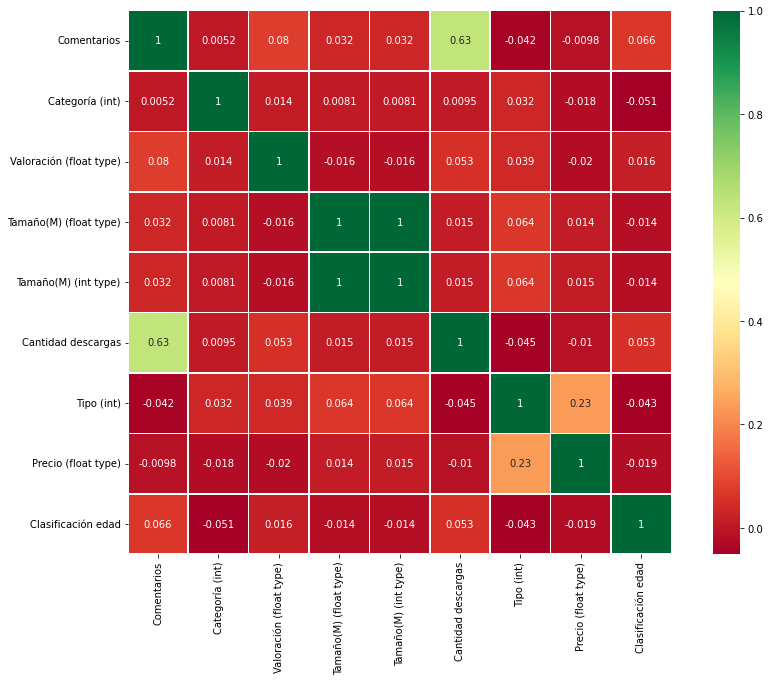

In [ ]:
# Correlación de los datos
data = dataframe.corr()

sns.heatmap(data = data,
            annot = bool(True),
            cmap = str("RdYlGn"),
            square = bool(True),
            linewidths = float(0.5))

plt.gcf().set_size_inches(int(15), int(10))

In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9141 entries, 0 to 9140
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   App                      9141 non-null   string 
 1   Categoría                9141 non-null   string 
 2   Valoración               7725 non-null   string 
 3   Comentarios              9141 non-null   int64  
 4   Tamaño(M)                9141 non-null   string 
 5   Descargas                9141 non-null   string 
 6   Tipo                     9141 non-null   string 
 7   Precio                   9141 non-null   string 
 8   Clasificación            9141 non-null   string 
 9   Categoría (int)          9141 non-null   int64  
 10  Valoración (float type)  9141 non-null   float64
 11  Tamaño(M) (float type)   9141 non-null   float64
 12  Tamaño(M) (int type)     9141 non-null   int64  
 13  Cantidad descargas       9141 non-null   int64  
 14  Tipo (int)              

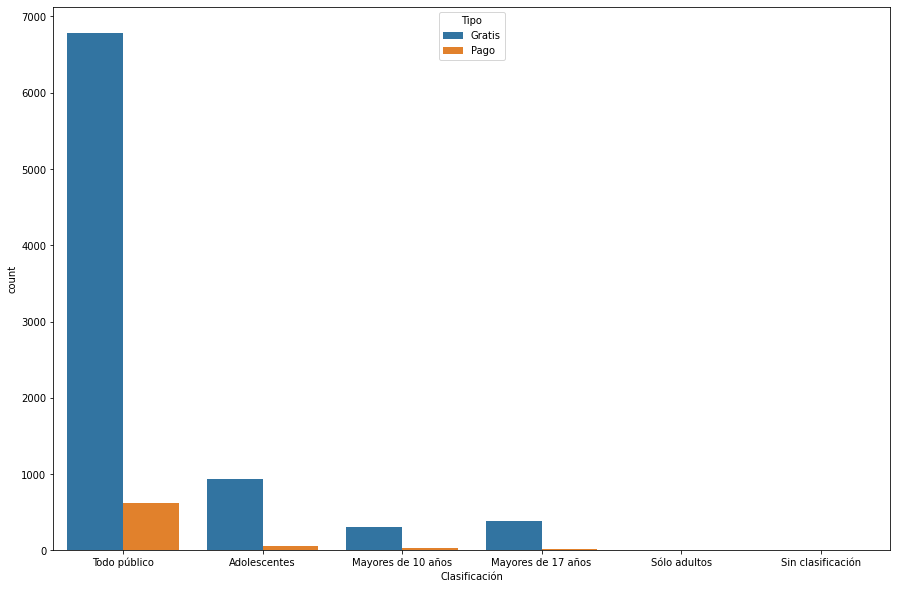

In [ ]:
# Variables
x: pd.DataFrame = dataframe["Clasificación"]
data: pd.DataFrame = dataframe.groupby(by = "Cantidad descargas").count()
hue: str = dataframe["Tipo"]



ax = sns.countplot(x = x,
                   data = data,
                   hue = hue)

plt.gcf().set_size_inches(15, 10)

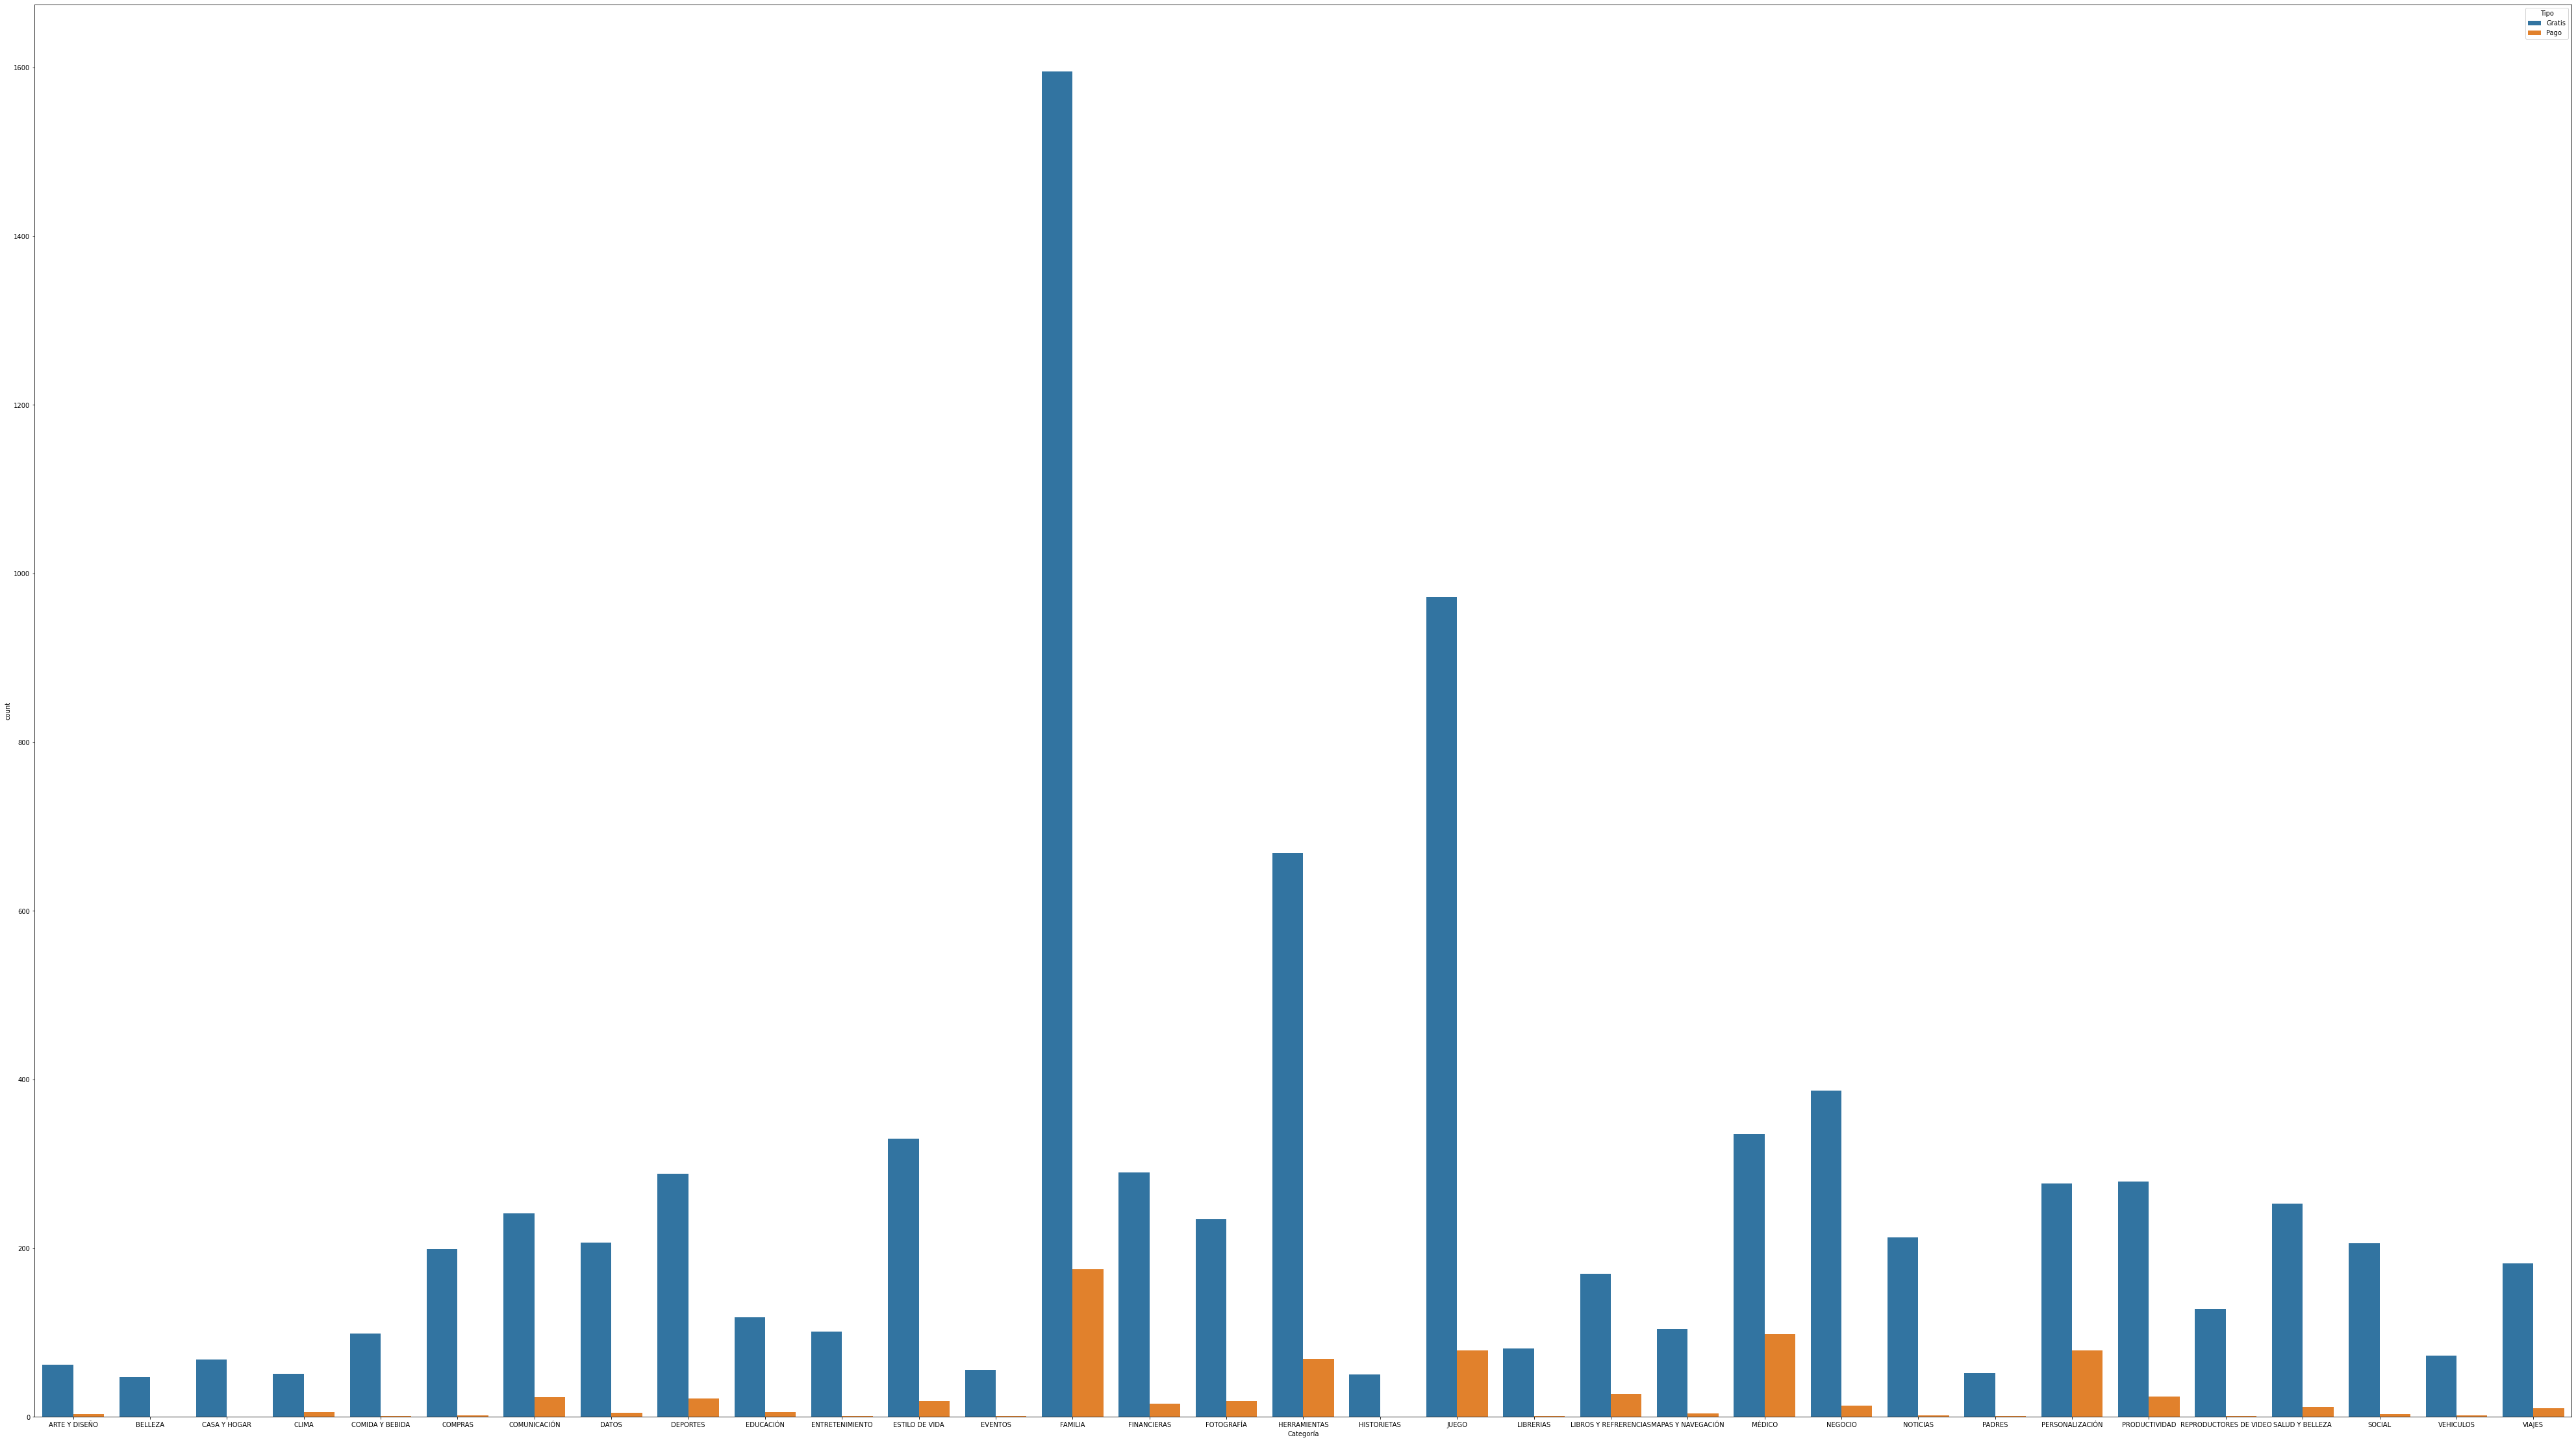

In [ ]:
# Variables
x: pd.DataFrame = dataframe["Categoría"]
data: pd.DataFrame = dataframe.groupby(by = "Cantidad descargas").count()
hue: str = dataframe["Tipo"]



ax = sns.countplot(x = x,
                   data = data,
                   hue = hue)

plt.gcf().set_size_inches(70, 40)

## Escribir una pequeña reseña de los resultados analizados y las correlaciones que  usaría para implementar un modelo de Machine Learning.

Se observa que las aplicaciones para "Todo público" y que son "gratis" son los más instalados, por otro lado, las aplicaciones para "Sólo adultos" y "Sin clasificación" son los menos instalados.

En la parte de categoría, las aplicaciones "Familia" y que son "gratis" son los más instalados.

# Modelo 1

## Implemente sus modelos desde aquí

In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9141 entries, 0 to 9140
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   App                      9141 non-null   string 
 1   Categoría                9141 non-null   string 
 2   Valoración               7725 non-null   string 
 3   Comentarios              9141 non-null   int64  
 4   Tamaño(M)                9141 non-null   string 
 5   Descargas                9141 non-null   string 
 6   Tipo                     9141 non-null   string 
 7   Precio                   9141 non-null   string 
 8   Clasificación            9141 non-null   string 
 9   Categoría (int)          9141 non-null   int64  
 10  Valoración (float type)  9141 non-null   float64
 11  Tamaño(M) (float type)   9141 non-null   float64
 12  Tamaño(M) (int type)     9141 non-null   int64  
 13  Cantidad descargas       9141 non-null   int64  
 14  Tipo (int)              

In [ ]:
caracteristicas: list = [
    "Cantidad descargas"
]

data = dataframe[caracteristicas][1:] # X
clase = dataframe["Clasificación edad"][1:] # Y

print(data, clase)

      Cantidad descargas
1                  10000
2                1000000
3                5000000
4                1000000
5                  50000
...                  ...
9136               10000
9137                1000
9138            10000000
9139             5000000
9140            10000000

[9140 rows x 1 columns] 1       12
2        0
3        0
4        0
5        0
        ..
9136     0
9137     0
9138     0
9139     0
9140     0
Name: Clasificación edad, Length: 9140, dtype: int64


In [ ]:
rKFold = RepeatedKFold(
    n_splits = int(75),
    n_repeats = int(15),
    random_state = int(7) # Asegura que se obtenga las mismas muestras cada vez que se genera el conjunto de datos
)
n_iteraciones: int = int(0)

for p_entrenamiento, p_prueba in rKFold.split(data,clase):
  datos_entrenamiento, datos_prueba = data.iloc[p_entrenamiento], data.iloc[p_prueba]
  clasi_entrenamiento, clasi_prueba = clase.iloc[p_entrenamiento], clase.iloc[p_prueba]
  n_iteraciones += int(1)

print("El uso de datos para entrenamiento es {}, : {}".format(
    datos_entrenamiento.shape,
    clasi_entrenamiento.shape
))
print("El uso de datos para prueba es {}, : {}".format(
    datos_prueba.shape,
    clasi_prueba.shape
))
print("# iteraciones:", n_iteraciones)

El uso de datos para entrenamiento es (9019, 1), : (9019,)
El uso de datos para prueba es (121, 1), : (121,)
# iteraciones: 1125


In [ ]:
# Modelos de ML
# KNeighborsClassifier
# LogisticRegression
# SVC
# GaussianNB
# LinearDiscriminantAnalysis
# DecisionTreeClassifier
modelos: list = []
modelos.append(("KNC",  KNeighborsClassifier()))
modelos.append(("LR",   LogisticRegression()))
modelos.append(("SVC",  SVC(gamma = "auto")))
modelos.append(("GNV",  GaussianNB()))
modelos.append(("LDA",  LinearDiscriminantAnalysis()))
modelos.append(("DTC",  DecisionTreeClassifier()))

for nombre, modelo in modelos:
  modelo.fit(datos_entrenamiento, clasi_entrenamiento)
  resultado: float = modelo.score(datos_prueba, clasi_prueba)
  print("El modelo {modelo}, tiene una presición de {presi:.3f}%".format(
      modelo = str(nombre),
      presi = float(resultado * 100)
  ))

El modelo KNC, tiene una presición de 85.950%
El modelo LR, tiene una presición de 86.777%
El modelo SVC, tiene una presición de 86.777%
El modelo GNV, tiene una presición de 85.950%
El modelo LDA, tiene una presición de 86.777%
El modelo DTC, tiene una presición de 86.777%


In [ ]:
modelos

[('KNC', KNeighborsClassifier()),
 ('LR', LogisticRegression()),
 ('SVC', SVC(gamma='auto')),
 ('GNV', GaussianNB()),
 ('LDA', LinearDiscriminantAnalysis()),
 ('DTC', DecisionTreeClassifier())]

In [ ]:
modelo_final: list = modelos[1][1] # Obtener el modelo de la posición 1 y su modelo como tal
predict = modelo_final.predict(datos_prueba)
print(predict, "\n", clasi_prueba)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0] 
 139      0
176      0
183      0
322      0
328     12
        ..
8617     0
8632     0
8909     0
8918     0
9061     0
Name: Clasificación edad, Length: 121, dtype: int64


In [ ]:
modelo_final.feature_names_in_

array(['Cantidad descargas'], dtype=object)

In [ ]:
modelo_final

LogisticRegression()

## Evalúe sus modelos

In [ ]:
cantidad_descargas: list = [
    int(100000000),
    int(10000000),
    int(1000000),
    int(100000),
    int(10000),
    int(1000),
    int(100),
    int(10),
    int(1)
]
iterador: int = int(0)

for i in cantidad_descargas:
  data_p: pd.DataFrame = pd.DataFrame(np.array([
      i
      ]).reshape(1, -1),
      columns = caracteristicas)
  
  print(
      "{i}° predicción: {modelo}".format(
          i = int(iterador + 1),
          modelo = modelo_final.predict(data_p)
      )
    )
  
  print("")

  iterador += int(1)

1° predicción: [0]

2° predicción: [0]

3° predicción: [0]

4° predicción: [0]

5° predicción: [0]

6° predicción: [0]

7° predicción: [0]

8° predicción: [0]

9° predicción: [0]



## Accuracy

In [ ]:
caracteristicas = dataframe[caracteristicas].astype(np.float64)
label = dataframe['Clasificación edad']
print(caracteristicas)
print(label)

      Cantidad descargas
0                 5000.0
1                10000.0
2              1000000.0
3              5000000.0
4              1000000.0
...                  ...
9136             10000.0
9137              1000.0
9138          10000000.0
9139           5000000.0
9140          10000000.0

[9141 rows x 1 columns]
0        0
1       12
2        0
3        0
4        0
        ..
9136     0
9137     0
9138     0
9139     0
9140     0
Name: Clasificación edad, Length: 9141, dtype: int64


In [ ]:
datos_entre, datos_prueba, eti_entre, eti_prueba = train_test_split(
    caracteristicas,
    label,
    test_size = 0.25,
    random_state = 2
)
print('Los datos para entrenamiento son:',datos_entre.shape)
print('Los datos para prueba son:',datos_prueba.shape)
print('Los eti para entrenamiento son:',eti_entre.shape)
print('Los eti para prueba son:',eti_prueba.shape)

Los datos para entrenamiento son: (6855, 1)
Los datos para prueba son: (2286, 1)
Los eti para entrenamiento son: (6855,)
Los eti para prueba son: (2286,)


In [ ]:
print(datos_entre)
print(eti_entre)
datos_entre.join(eti_entre)

      Cantidad descargas
5546            100000.0
6288              1000.0
191            5000000.0
8751            100000.0
8391          10000000.0
...                  ...
1099            500000.0
2514           1000000.0
6637              1000.0
2575              1000.0
7336           5000000.0

[6855 rows x 1 columns]
5546    10
6288     0
191      0
8751     0
8391     0
        ..
1099     0
2514    12
6637     0
2575     0
7336     0
Name: Clasificación edad, Length: 6855, dtype: int64


,Cantidad descargas,Clasificación edad
5546,100000.0,10
6288,1000.0,0
191,5000000.0,0
8751,100000.0,0
8391,10000000.0,0
...,...,...
1099,500000.0,0
2514,1000000.0,12
6637,1000.0,0
2575,1000.0,0


In [ ]:
# DecisionTreeClassifier
# KNeighborsClassifier
modelos = []
modelos.append(('DecisionTreeClassifier', DecisionTreeClassifier()))
modelos.append(('KNeighborsClassifier', KNeighborsClassifier()))
resultados = []

for nombre,modelo in modelos:
  modelo.fit(datos_entre,eti_entre)
  resultado = modelo.score(datos_prueba, eti_prueba)
  resultados.append(float(resultado * 100))
  print('El modelo {} tiene como resultado {:.2f}%'.format(
      nombre,
      float(resultado * 100)
  ))

El modelo DecisionTreeClassifier tiene como resultado 81.15%
El modelo KNeighborsClassifier tiene como resultado 81.10%


In [ ]:
print(eti_entre.value_counts())
print(pd.Series(modelos[1][1].predict(datos_entre)).value_counts())

 0     5561
 12     752
 17     298
 10     240
-1        2
 18       2
Name: Clasificación edad, dtype: int64
0     6846
12       9
dtype: int64


In [ ]:
"""
datos_predict = modelos[0][1].predict(datos_entre)
confusion = confusion_matrix(eti_entre, datos_predict)
print(confusion)
# orden de retorno:
# verdaderos negativo
# falsos positivos
# falsos negativos
# verdaderos positivos
# v1,v2,v3,v4=[1,2,3,4]
vn, fp, fn, vp = confusion.ravel()
matriz = np.array([[vp, fn], [fp, vn]])
print(matriz)
plt.figure(
    figsize = (12,10)
)
grafico = plt.subplot()

sns.heatmap(matriz, annot = True,
            ax = grafico,
            fmt = 'g')

grafico.xaxis.set_ticklabels(['Positivo',
                              'Negativo'])
grafico.yaxis.set_ticklabels(['Verdaderos',
                              'Falsos'])

grafico.set_xlabel('Predicción')
grafico.set_ylabel('Actual')
"""

"\ndatos_predict = modelos[0][1].predict(datos_entre)\nconfusion = confusion_matrix(eti_entre, datos_predict)\nprint(confusion)\n# orden de retorno:\n# verdaderos negativo\n# falsos positivos\n# falsos negativos\n# verdaderos positivos\n# v1,v2,v3,v4=[1,2,3,4]\nvn, fp, fn, vp = confusion.ravel()\nmatriz = np.array([[vp, fn], [fp, vn]])\nprint(matriz)\nplt.figure(\n    figsize = (12,10)\n)\ngrafico = plt.subplot()\n\nsns.heatmap(matriz, annot = True,\n            ax = grafico,\n            fmt = 'g')\n\ngrafico.xaxis.set_ticklabels(['Positivo',\n                              'Negativo'])\ngrafico.yaxis.set_ticklabels(['Verdaderos',\n                              'Falsos'])\n\ngrafico.set_xlabel('Predicción')\ngrafico.set_ylabel('Actual')\n"

# Modelo 2

## Implemente sus modelos desde aquí

In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9141 entries, 0 to 9140
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   App                      9141 non-null   string 
 1   Categoría                9141 non-null   string 
 2   Valoración               7725 non-null   string 
 3   Comentarios              9141 non-null   int64  
 4   Tamaño(M)                9141 non-null   string 
 5   Descargas                9141 non-null   string 
 6   Tipo                     9141 non-null   string 
 7   Precio                   9141 non-null   string 
 8   Clasificación            9141 non-null   string 
 9   Categoría (int)          9141 non-null   int64  
 10  Valoración (float type)  9141 non-null   float64
 11  Tamaño(M) (float type)   9141 non-null   float64
 12  Tamaño(M) (int type)     9141 non-null   int64  
 13  Cantidad descargas       9141 non-null   int64  
 14  Tipo (int)              

In [ ]:
caracteristicas: list = [
    "Cantidad descargas"
]

data = dataframe[caracteristicas][1:] # X
clase = dataframe["Tipo (int)"][1:] # Y

print(data, clase)

      Cantidad descargas
1                  10000
2                1000000
3                5000000
4                1000000
5                  50000
...                  ...
9136               10000
9137                1000
9138            10000000
9139             5000000
9140            10000000

[9140 rows x 1 columns] 1       0
2       0
3       0
4       0
5       0
       ..
9136    0
9137    0
9138    0
9139    0
9140    0
Name: Tipo (int), Length: 9140, dtype: int64


In [ ]:
rKFold = RepeatedKFold(
    n_splits = int(75),
    n_repeats = int(15),
    random_state = int(7) # Asegura que se obtenga las mismas muestras cada vez que se genera el conjunto de datos
)
n_iteraciones: int = int(0)

for p_entrenamiento, p_prueba in rKFold.split(data,clase):
  datos_entrenamiento, datos_prueba = data.iloc[p_entrenamiento], data.iloc[p_prueba]
  clasi_entrenamiento, clasi_prueba = clase.iloc[p_entrenamiento], clase.iloc[p_prueba]
  n_iteraciones += int(1)

print("El uso de datos para entrenamiento es {}, : {}".format(
    datos_entrenamiento.shape,
    clasi_entrenamiento.shape
))
print("El uso de datos para prueba es {}, : {}".format(
    datos_prueba.shape,
    clasi_prueba.shape
))
print("# iteraciones:", n_iteraciones)

El uso de datos para entrenamiento es (9019, 1), : (9019,)
El uso de datos para prueba es (121, 1), : (121,)
# iteraciones: 1125


In [ ]:
# Modelos de ML
# KNeighborsClassifier
# LogisticRegression
# SVC
# GaussianNB
# LinearDiscriminantAnalysis
# DecisionTreeClassifier
modelos: list = []
modelos.append(("KNC",  KNeighborsClassifier()))
modelos.append(("LR",   LogisticRegression()))
modelos.append(("SVC",  SVC(gamma = "auto")))
modelos.append(("GNV",  GaussianNB()))
modelos.append(("LDA",  LinearDiscriminantAnalysis()))
modelos.append(("DTC",  DecisionTreeClassifier()))

for nombre, modelo in modelos:
  modelo.fit(datos_entrenamiento, clasi_entrenamiento)
  resultado: float = modelo.score(datos_prueba, clasi_prueba)
  print("El modelo {modelo}, tiene una presición de {presi:.3f}%".format(
      modelo = str(nombre),
      presi = float(resultado * 100)
  ))

El modelo KNC, tiene una presición de 94.215%
El modelo LR, tiene una presición de 94.215%
El modelo SVC, tiene una presición de 94.215%
El modelo GNV, tiene una presición de 41.322%
El modelo LDA, tiene una presición de 94.215%
El modelo DTC, tiene una presición de 94.215%


In [ ]:
modelos

[('KNC', KNeighborsClassifier()),
 ('LR', LogisticRegression()),
 ('SVC', SVC(gamma='auto')),
 ('GNV', GaussianNB()),
 ('LDA', LinearDiscriminantAnalysis()),
 ('DTC', DecisionTreeClassifier())]

In [ ]:
modelo_final: list = modelos[1][1] # Obtener el modelo de la posición 1 y su modelo como tal
predict = modelo_final.predict(datos_prueba)
print(predict, "\n", clasi_prueba)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0] 
 139     0
176     0
183     0
322     0
328     0
       ..
8617    0
8632    0
8909    0
8918    0
9061    0
Name: Tipo (int), Length: 121, dtype: int64


In [ ]:
modelo_final.feature_names_in_

array(['Cantidad descargas'], dtype=object)

In [ ]:
modelo_final

LogisticRegression()

## Evalúe sus modelos

In [ ]:
# Pregunta:
# ¿Una aplicación gratuita tendrá más descargas que una aplicación de pago?

print("Categorías: {}".format(
    caracteristicas
))

print("")

print("Info tipo:")
dataframe[["Tipo", "Tipo (int)"]].value_counts()

Categorías: ['Cantidad descargas']

Info tipo:


Tipo    Tipo (int)
Gratis  0             8417
Pago    1              724
dtype: int64

In [ ]:
array: list = []
array.append(10000)
array.append(9000)
array.append(8000)
array.append(7000)
array.append(6000)
array.append(5000)
array.append(4000)
array.append(3000)
array.append(2000)
array.append(1000)

iteracion: int = int(0)

for i in array:
  # Para quitar el warning anterior
  data_p = pd.DataFrame(np.array([
      i
      ]).reshape(1, -1),
      columns = caracteristicas)

  print("{i}° valor ({valor}) de la predicción: {modelo}".format(
      i = int(iteracion + 1),
      valor = int(i),
      modelo = modelo_final.predict(data_p)
  ))

  iteracion += int(1)

1° valor (10000) de la predicción: [0]
2° valor (9000) de la predicción: [0]
3° valor (8000) de la predicción: [0]
4° valor (7000) de la predicción: [0]
5° valor (6000) de la predicción: [0]
6° valor (5000) de la predicción: [0]
7° valor (4000) de la predicción: [0]
8° valor (3000) de la predicción: [0]
9° valor (2000) de la predicción: [0]
10° valor (1000) de la predicción: [0]


## Accuracy

In [ ]:
caracteristicas = dataframe[caracteristicas].astype(np.float64)
label = dataframe['Clasificación edad']
print(caracteristicas)
print(label)

      Cantidad descargas
0                 5000.0
1                10000.0
2              1000000.0
3              5000000.0
4              1000000.0
...                  ...
9136             10000.0
9137              1000.0
9138          10000000.0
9139           5000000.0
9140          10000000.0

[9141 rows x 1 columns]
0        0
1       12
2        0
3        0
4        0
        ..
9136     0
9137     0
9138     0
9139     0
9140     0
Name: Clasificación edad, Length: 9141, dtype: int64


In [ ]:
datos_entre, datos_prueba, eti_entre, eti_prueba = train_test_split(
    caracteristicas,
    label,
    test_size = 0.25,
    random_state = 2
)
print('Los datos para entrenamiento son:',datos_entre.shape)
print('Los datos para prueba son:',datos_prueba.shape)
print('Los eti para entrenamiento son:',eti_entre.shape)
print('Los eti para prueba son:',eti_prueba.shape)

Los datos para entrenamiento son: (6855, 1)
Los datos para prueba son: (2286, 1)
Los eti para entrenamiento son: (6855,)
Los eti para prueba son: (2286,)


In [ ]:
print(datos_entre)
print(eti_entre)
datos_entre.join(eti_entre)

      Cantidad descargas
5546            100000.0
6288              1000.0
191            5000000.0
8751            100000.0
8391          10000000.0
...                  ...
1099            500000.0
2514           1000000.0
6637              1000.0
2575              1000.0
7336           5000000.0

[6855 rows x 1 columns]
5546    10
6288     0
191      0
8751     0
8391     0
        ..
1099     0
2514    12
6637     0
2575     0
7336     0
Name: Clasificación edad, Length: 6855, dtype: int64


,Cantidad descargas,Clasificación edad
5546,100000.0,10
6288,1000.0,0
191,5000000.0,0
8751,100000.0,0
8391,10000000.0,0
...,...,...
1099,500000.0,0
2514,1000000.0,12
6637,1000.0,0
2575,1000.0,0


In [ ]:
# DecisionTreeClassifier
# KNeighborsClassifier
modelos = []
modelos.append(('DecisionTreeClassifier', DecisionTreeClassifier()))
modelos.append(('KNeighborsClassifier', KNeighborsClassifier()))
resultados = []

for nombre,modelo in modelos:
  modelo.fit(datos_entre,eti_entre)
  resultado = modelo.score(datos_prueba, eti_prueba)
  resultados.append(float(resultado * 100))
  print('El modelo {} tiene como resultado {:.2f}%'.format(
      nombre,
      float(resultado * 100)
  ))

El modelo DecisionTreeClassifier tiene como resultado 81.15%
El modelo KNeighborsClassifier tiene como resultado 81.10%


In [ ]:
print(eti_entre.value_counts())
print(pd.Series(modelos[1][1].predict(datos_entre)).value_counts())

 0     5561
 12     752
 17     298
 10     240
-1        2
 18       2
Name: Clasificación edad, dtype: int64
0     6846
12       9
dtype: int64


In [ ]:
"""
datos_predict = modelos[0][1].predict(datos_entre)
confusion = confusion_matrix(eti_entre, datos_predict)
print(confusion)
# orden de retorno:
# verdaderos negativo
# falsos positivos
# falsos negativos
# verdaderos positivos
# v1,v2,v3,v4=[1,2,3,4]
vn, fp, fn, vp = confusion.ravel()
matriz = np.array([[vp, fn], [fp, vn]])
print(matriz)
plt.figure(
    figsize = (12,10)
)
grafico = plt.subplot()

sns.heatmap(matriz, annot = True,
            ax = grafico,
            fmt = 'g')

grafico.xaxis.set_ticklabels(['Positivo',
                              'Negativo'])
grafico.yaxis.set_ticklabels(['Verdaderos',
                              'Falsos'])

grafico.set_xlabel('Predicción')
grafico.set_ylabel('Actual')
"""

"\ndatos_predict = modelos[0][1].predict(datos_entre)\nconfusion = confusion_matrix(eti_entre, datos_predict)\nprint(confusion)\n# orden de retorno:\n# verdaderos negativo\n# falsos positivos\n# falsos negativos\n# verdaderos positivos\n# v1,v2,v3,v4=[1,2,3,4]\nvn, fp, fn, vp = confusion.ravel()\nmatriz = np.array([[vp, fn], [fp, vn]])\nprint(matriz)\nplt.figure(\n    figsize = (12,10)\n)\ngrafico = plt.subplot()\n\nsns.heatmap(matriz, annot = True,\n            ax = grafico,\n            fmt = 'g')\n\ngrafico.xaxis.set_ticklabels(['Positivo',\n                              'Negativo'])\ngrafico.yaxis.set_ticklabels(['Verdaderos',\n                              'Falsos'])\n\ngrafico.set_xlabel('Predicción')\ngrafico.set_ylabel('Actual')\n"

# Modelo 3

## Implemente sus modelos desde aquí

In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9141 entries, 0 to 9140
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   App                      9141 non-null   string 
 1   Categoría                9141 non-null   string 
 2   Valoración               7725 non-null   string 
 3   Comentarios              9141 non-null   int64  
 4   Tamaño(M)                9141 non-null   string 
 5   Descargas                9141 non-null   string 
 6   Tipo                     9141 non-null   string 
 7   Precio                   9141 non-null   string 
 8   Clasificación            9141 non-null   string 
 9   Categoría (int)          9141 non-null   int64  
 10  Valoración (float type)  9141 non-null   float64
 11  Tamaño(M) (float type)   9141 non-null   float64
 12  Tamaño(M) (int type)     9141 non-null   int64  
 13  Cantidad descargas       9141 non-null   int64  
 14  Tipo (int)              

In [ ]:
caracteristicas: list = [
    "Comentarios",
    "Valoración (float type)",
    "Tipo (int)",
    "Clasificación edad"
]

data = dataframe[caracteristicas][1:] # X
clase = dataframe["Cantidad descargas"][1:] # Y

print(data, clase)

      Comentarios  Valoración (float type)  Tipo (int)  Clasificación edad
1             353                      4.7           0                  12
2           36815                      4.1           0                   0
3          194216                      4.3           0                   0
4           13880                      4.4           0                   0
5             118                      4.7           0                   0
...           ...                      ...         ...                 ...
9136           69                      3.0           0                   0
9137           34                      4.3           0                   0
9138       165299                      4.3           0                   0
9139        35560                      4.2           0                   0
9140       136626                      4.1           0                   0

[9140 rows x 4 columns] 1          10000
2        1000000
3        5000000
4        1000000
5      

In [ ]:
rKFold = RepeatedKFold(
    n_splits = int(75),
    n_repeats = int(15),
    random_state = int(7) # Asegura que se obtenga las mismas muestras cada vez que se genera el conjunto de datos
)
n_iteraciones: int = int(0)

for p_entrenamiento, p_prueba in rKFold.split(data,clase):
  datos_entrenamiento, datos_prueba = data.iloc[p_entrenamiento], data.iloc[p_prueba]
  clasi_entrenamiento, clasi_prueba = clase.iloc[p_entrenamiento], clase.iloc[p_prueba]
  n_iteraciones += int(1)

print("El uso de datos para entrenamiento es {}, : {}".format(
    datos_entrenamiento.shape,
    clasi_entrenamiento.shape
))
print("El uso de datos para prueba es {}, : {}".format(
    datos_prueba.shape,
    clasi_prueba.shape
))
print("# iteraciones:", n_iteraciones)

El uso de datos para entrenamiento es (9019, 4), : (9019,)
El uso de datos para prueba es (121, 4), : (121,)
# iteraciones: 1125


In [ ]:
# Modelos de ML
# KNeighborsClassifier
# LogisticRegression
# SVC
# GaussianNB
# LinearDiscriminantAnalysis
# DecisionTreeClassifier
modelos: list = []
modelos.append(("KNC",  KNeighborsClassifier()))
modelos.append(("LR",   LogisticRegression()))
modelos.append(("SVC",  SVC(gamma = "auto")))
modelos.append(("GNV",  GaussianNB()))
modelos.append(("LDA",  LinearDiscriminantAnalysis()))
modelos.append(("DTC",  DecisionTreeClassifier()))

for nombre, modelo in modelos:
  modelo.fit(datos_entrenamiento, clasi_entrenamiento)
  resultado: float = modelo.score(datos_prueba, clasi_prueba)
  print("El modelo {modelo}, tiene una presición de {presi:.3f}%".format(
      modelo = str(nombre),
      presi = float(resultado * 100)
  ))

El modelo KNC, tiene una presición de 47.107%


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


El modelo LR, tiene una presición de 0.826%
El modelo SVC, tiene una presición de 38.843%
El modelo GNV, tiene una presición de 28.926%
El modelo LDA, tiene una presición de 15.702%
El modelo DTC, tiene una presición de 52.066%


In [ ]:
modelos

[('KNC', KNeighborsClassifier()),
 ('LR', LogisticRegression()),
 ('SVC', SVC(gamma='auto')),
 ('GNV', GaussianNB()),
 ('LDA', LinearDiscriminantAnalysis()),
 ('DTC', DecisionTreeClassifier())]

In [ ]:
modelo_final: list = modelos[5][1] # Obtener el modelo de la posición 1 y su modelo como tal
predict = modelo_final.predict(datos_prueba)
print(predict, "\n", clasi_prueba)

[      100      1000    100000   1000000      1000       500   1000000
   1000000   1000000    100000  10000000    100000  50000000       100
      5000       100  10000000        10   1000000    500000       100
     10000   1000000       100      1000     10000       100   1000000
   1000000      1000   1000000      1000   1000000    100000      5000
   1000000   1000000  10000000  10000000    500000     50000       100
  10000000        10      1000      1000      5000   1000000    100000
   1000000   1000000   5000000      1000    100000    100000        10
   1000000       100  10000000     10000     10000       500       500
    100000    100000    100000        10    100000   5000000   1000000
    100000    100000  10000000  50000000 100000000   5000000   5000000
   1000000      1000   1000000   1000000     10000    100000       100
     50000      1000       100       100       100        10    100000
      1000         5      1000   5000000    100000   1000000   1000000
   100

In [ ]:
modelo_final.feature_names_in_

array(['Comentarios', 'Valoración (float type)', 'Tipo (int)',
       'Clasificación edad'], dtype=object)

In [ ]:
modelo_final

DecisionTreeClassifier()

## Evalúe sus modelos

In [ ]:
print("Categorías: {}".format(
    caracteristicas
))

print("")

print(dataframe[["Tipo", "Tipo (int)"]].value_counts())

print("")

print(dataframe[["Clasificación", "Clasificación edad"]].value_counts())

Categorías: ['Comentarios', 'Valoración (float type)', 'Tipo (int)', 'Clasificación edad']

Tipo    Tipo (int)
Gratis  0             8417
Pago    1              724
dtype: int64

Clasificación       Clasificación edad
Todo público         0                    7415
Adolescentes         12                    986
Mayores de 17 años   17                    405
Mayores de 10 años   10                    331
Sin clasificación   -1                       2
Sólo adultos         18                      2
dtype: int64


In [ ]:
mean_valoracion: float = dataframe["Valoración (float type)"].mean().astype(float)

array: list = []
array.append(1000000)
array.append(100000)
array.append(10000)
array.append(1000)
array.append(100)
array.append(10)
array.append(1)

i: int = int(0)

for value in array:
  data_p = pd.DataFrame(np.array([
      value,
      mean_valoracion,
      0,
      0
      ]).reshape(1, -1),
      columns = caracteristicas)

  print("")

  print("{i}° predicción con {comentarios} comentarios.".format(
      i = int(i + 1),
      comentarios = modelo_final.predict(data_p)
  ))

  i += int(1)


1° predicción con [100000000] comentarios.

2° predicción con [10000000] comentarios.

3° predicción con [1000000] comentarios.

4° predicción con [10000] comentarios.

5° predicción con [10000] comentarios.

6° predicción con [1000] comentarios.

7° predicción con [50] comentarios.


## Accuracy

In [ ]:
caracteristicas = dataframe[caracteristicas].astype(np.float64)
label = dataframe['Cantidad descargas']
print(caracteristicas)
print(label)

      Comentarios  Valoración (float type)  Tipo (int)  Clasificación edad
0            48.0                      4.8         0.0                 0.0
1           353.0                      4.7         0.0                12.0
2         36815.0                      4.1         0.0                 0.0
3        194216.0                      4.3         0.0                 0.0
4         13880.0                      4.4         0.0                 0.0
...           ...                      ...         ...                 ...
9136         69.0                      3.0         0.0                 0.0
9137         34.0                      4.3         0.0                 0.0
9138     165299.0                      4.3         0.0                 0.0
9139      35560.0                      4.2         0.0                 0.0
9140     136626.0                      4.1         0.0                 0.0

[9141 rows x 4 columns]
0           5000
1          10000
2        1000000
3        5000000
4      

In [ ]:
datos_entre, datos_prueba, eti_entre, eti_prueba = train_test_split(
    caracteristicas,
    label,
    test_size = 0.25,
    random_state = 2
)
print('Los datos para entrenamiento son:',datos_entre.shape)
print('Los datos para prueba son:',datos_prueba.shape)
print('Los eti para entrenamiento son:',eti_entre.shape)
print('Los eti para prueba son:',eti_prueba.shape)

Los datos para entrenamiento son: (6855, 4)
Los datos para prueba son: (2286, 4)
Los eti para entrenamiento son: (6855,)
Los eti para prueba son: (2286,)


In [ ]:
print(datos_entre)
print(eti_entre)
datos_entre.join(eti_entre)

      Comentarios  Valoración (float type)  Tipo (int)  Clasificación edad
5546      19922.0                 4.600000         1.0                10.0
6288          6.0                 4.320139         0.0                 0.0
191       54090.0                 4.500000         0.0                 0.0
8751       1403.0                 4.300000         0.0                 0.0
8391     259605.0                 4.400000         0.0                 0.0
...           ...                      ...         ...                 ...
1099       7543.0                 4.300000         0.0                 0.0
2514      22667.0                 4.300000         0.0                12.0
6637          6.0                 4.179630         0.0                 0.0
2575         11.0                 4.182841         0.0                 0.0
7336      20973.0                 3.100000         0.0                 0.0

[6855 rows x 4 columns]
5546      100000
6288        1000
191      5000000
8751      100000
8391   

,Comentarios,Valoración (float type),Tipo (int),Clasificación edad,Cantidad descargas
5546,19922.0,4.600000,1.0,10.0,100000
6288,6.0,4.320139,0.0,0.0,1000
191,54090.0,4.500000,0.0,0.0,5000000
8751,1403.0,4.300000,0.0,0.0,100000
8391,259605.0,4.400000,0.0,0.0,10000000
...,...,...,...,...,...
1099,7543.0,4.300000,0.0,0.0,500000
2514,22667.0,4.300000,0.0,12.0,1000000
6637,6.0,4.179630,0.0,0.0,1000
2575,11.0,4.182841,0.0,0.0,1000


In [ ]:
# DecisionTreeClassifier
# KNeighborsClassifier
modelos = []
modelos.append(('DecisionTreeClassifier', DecisionTreeClassifier()))
modelos.append(('KNeighborsClassifier', KNeighborsClassifier()))
resultados = []

for nombre,modelo in modelos:
  modelo.fit(datos_entre,eti_entre)
  resultado = modelo.score(datos_prueba, eti_prueba)
  resultados.append(float(resultado * 100))
  print('El modelo {} tiene como resultado {:.2f}%'.format(
      nombre,
      float(resultado * 100)
  ))

El modelo DecisionTreeClassifier tiene como resultado 48.16%
El modelo KNeighborsClassifier tiene como resultado 45.36%


In [ ]:
print(eti_entre.value_counts())
print(pd.Series(modelos[1][1].predict(datos_entre)).value_counts())

1000000       1003
100000         787
10000          744
1000           660
10000000       622
100            533
5000000        391
500000         379
5000           336
50000          329
10             262
500            237
50             149
100000000      148
50000000       118
5               60
1               51
500000000       26
0               11
1000000000       9
Name: Cantidad descargas, dtype: int64
1000000       1120
100000         916
10000          879
1000           675
100            642
10000000       606
10             331
5000000        316
500000         266
5000           246
50000          237
500            152
100000000      136
50             123
50000000        96
5               38
1               31
500000000       27
1000000000      12
0                6
dtype: int64


In [ ]:
"""
datos_predict = modelos[0][1].predict(datos_entre)
confusion = confusion_matrix(eti_entre, datos_predict)
print(confusion)
# orden de retorno:
# verdaderos negativo
# falsos positivos
# falsos negativos
# verdaderos positivos
# v1,v2,v3,v4=[1,2,3,4]
vn, fp, fn, vp = confusion.ravel()
matriz = np.array([[vp, fn], [fp, vn]])
print(matriz)
plt.figure(
    figsize = (12,10)
)
grafico = plt.subplot()

sns.heatmap(matriz, annot = True,
            ax = grafico,
            fmt = 'g')

grafico.xaxis.set_ticklabels(['Positivo',
                              'Negativo'])
grafico.yaxis.set_ticklabels(['Verdaderos',
                              'Falsos'])

grafico.set_xlabel('Predicción')
grafico.set_ylabel('Actual')
"""

"\ndatos_predict = modelos[0][1].predict(datos_entre)\nconfusion = confusion_matrix(eti_entre, datos_predict)\nprint(confusion)\n# orden de retorno:\n# verdaderos negativo\n# falsos positivos\n# falsos negativos\n# verdaderos positivos\n# v1,v2,v3,v4=[1,2,3,4]\nvn, fp, fn, vp = confusion.ravel()\nmatriz = np.array([[vp, fn], [fp, vn]])\nprint(matriz)\nplt.figure(\n    figsize = (12,10)\n)\ngrafico = plt.subplot()\n\nsns.heatmap(matriz, annot = True,\n            ax = grafico,\n            fmt = 'g')\n\ngrafico.xaxis.set_ticklabels(['Positivo',\n                              'Negativo'])\ngrafico.yaxis.set_ticklabels(['Verdaderos',\n                              'Falsos'])\n\ngrafico.set_xlabel('Predicción')\ngrafico.set_ylabel('Actual')\n"

# Modelo 4

## Implemente sus modelos desde aquí

In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9141 entries, 0 to 9140
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   App                      9141 non-null   string 
 1   Categoría                9141 non-null   string 
 2   Valoración               7725 non-null   string 
 3   Comentarios              9141 non-null   int64  
 4   Tamaño(M)                9141 non-null   string 
 5   Descargas                9141 non-null   string 
 6   Tipo                     9141 non-null   string 
 7   Precio                   9141 non-null   string 
 8   Clasificación            9141 non-null   string 
 9   Categoría (int)          9141 non-null   int64  
 10  Valoración (float type)  9141 non-null   float64
 11  Tamaño(M) (float type)   9141 non-null   float64
 12  Tamaño(M) (int type)     9141 non-null   int64  
 13  Cantidad descargas       9141 non-null   int64  
 14  Tipo (int)              

In [ ]:
caracteristicas: list = [
    "Cantidad descargas",
    "Valoración (float type)",
    "Tipo (int)",
    "Clasificación edad"
]

data = dataframe[caracteristicas][1:] # X
clase = dataframe["Categoría (int)"][1:] # Y

print(data, clase)

      Cantidad descargas  Valoración (float type)  Tipo (int)  \
1                  10000                      4.7           0   
2                1000000                      4.1           0   
3                5000000                      4.3           0   
4                1000000                      4.4           0   
5                  50000                      4.7           0   
...                  ...                      ...         ...   
9136               10000                      3.0           0   
9137                1000                      4.3           0   
9138            10000000                      4.3           0   
9139             5000000                      4.2           0   
9140            10000000                      4.1           0   

      Clasificación edad  
1                     12  
2                      0  
3                      0  
4                      0  
5                      0  
...                  ...  
9136                   0  
913

In [ ]:
rKFold = RepeatedKFold(
    n_splits = int(75),
    n_repeats = int(15),
    random_state = int(7) # Asegura que se obtenga las mismas muestras cada vez que se genera el conjunto de datos
)
n_iteraciones: int = int(0)

for p_entrenamiento, p_prueba in rKFold.split(data,clase):
  datos_entrenamiento, datos_prueba = data.iloc[p_entrenamiento], data.iloc[p_prueba]
  clasi_entrenamiento, clasi_prueba = clase.iloc[p_entrenamiento], clase.iloc[p_prueba]
  n_iteraciones += int(1)

print("El uso de datos para entrenamiento es {}, : {}".format(
    datos_entrenamiento.shape,
    clasi_entrenamiento.shape
))
print("El uso de datos para prueba es {}, : {}".format(
    datos_prueba.shape,
    clasi_prueba.shape
))
print("# iteraciones:", n_iteraciones)

El uso de datos para entrenamiento es (9019, 4), : (9019,)
El uso de datos para prueba es (121, 4), : (121,)
# iteraciones: 1125


In [ ]:
# Modelos de ML
# KNeighborsClassifier
# LogisticRegression
# SVC
# GaussianNB
# LinearDiscriminantAnalysis
# DecisionTreeClassifier
modelos: list = []
modelos.append(("KNC",  KNeighborsClassifier()))
modelos.append(("LR",   LogisticRegression()))
modelos.append(("SVC",  SVC(gamma = "auto")))
modelos.append(("GNV",  GaussianNB()))
modelos.append(("LDA",  LinearDiscriminantAnalysis()))
modelos.append(("DTC",  DecisionTreeClassifier()))

for nombre, modelo in modelos:
  modelo.fit(datos_entrenamiento, clasi_entrenamiento)
  resultado: float = modelo.score(datos_prueba, clasi_prueba)
  print("El modelo {modelo}, tiene una presición de {presi:.3f}%".format(
      modelo = str(nombre),
      presi = float(resultado * 100)
  ))

El modelo KNC, tiene una presición de 21.488%


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


El modelo LR, tiene una presición de 11.570%
El modelo SVC, tiene una presición de 22.314%
El modelo GNV, tiene una presición de 14.876%
El modelo LDA, tiene una presición de 19.835%
El modelo DTC, tiene una presición de 32.231%


In [ ]:
modelos

[('KNC', KNeighborsClassifier()),
 ('LR', LogisticRegression()),
 ('SVC', SVC(gamma='auto')),
 ('GNV', GaussianNB()),
 ('LDA', LinearDiscriminantAnalysis()),
 ('DTC', DecisionTreeClassifier())]

In [ ]:
modelo_final: list = modelos[5][1] # Obtener el modelo de la posición 1 y su modelo como tal
predict = modelo_final.predict(datos_prueba)
print(predict, "\n", clasi_prueba)

[ 3 14 14 14 12  2 14 16 19 14 19 14 12  7 14  8  9  9 14 14 12  7 14 23
 30 14 14 14 14 14 14 28 14 14 14 14 14 16 16 14 14 14 14 28 14 14 14 14
 14 14 14 19 15  3 14 17 17 17 19 14  7 14 17 15 24 14 19 14 14 14 14 14
 19 14 19 19 14 14 24 14 14 17 14 23 23 14 23 14 23 24 14 14 25 14 19 14
 14 14 14 26 19  7 27 14 14 14 14 14 17 14  3 14 14 30 30 17 14 19 14 14
 17] 
 139      3
176      3
183      4
322      5
328      5
        ..
8617    30
8632    30
8909    32
8918    32
9061    33
Name: Categoría (int), Length: 121, dtype: int64


In [ ]:
modelo_final.feature_names_in_

array(['Cantidad descargas', 'Valoración (float type)', 'Tipo (int)',
       'Clasificación edad'], dtype=object)

In [ ]:
modelo_final

DecisionTreeClassifier()

## Evalúe sus modelos

In [ ]:
print("Categorías: {}".format(
    caracteristicas
))

print("")

print(dataframe[["Tipo", "Tipo (int)"]].value_counts())

print("")

print(dataframe[["Clasificación", "Clasificación edad"]].value_counts())

Categorías: ['Cantidad descargas', 'Valoración (float type)', 'Tipo (int)', 'Clasificación edad']

Tipo    Tipo (int)
Gratis  0             8417
Pago    1              724
dtype: int64

Clasificación       Clasificación edad
Todo público         0                    7415
Adolescentes         12                    986
Mayores de 17 años   17                    405
Mayores de 10 años   10                    331
Sin clasificación   -1                       2
Sólo adultos         18                      2
dtype: int64


In [ ]:
mean_comentarios: int = dataframe["Comentarios"].mean().round().astype(int)
mean_valoracion: float = dataframe["Valoración (float type)"].mean().astype(float)

catnum = list(dataframe["Categoría (int)"].unique())
cat = list(dataframe["Categoría"].unique())
index = str("")

array: list = []
array.append(0)
array.append(10)
array.append(12)
array.append(17)
array.append(18)
array.append(-1)

i: int = int(0)

for value in array:
  data_p = pd.DataFrame(np.array([
        mean_comentarios, # Colentarios - 
        mean_valoracion,  # Valoración
        0,    # Tipo
        value    # Calificación
        ]).reshape(1, -1),
        columns = caracteristicas)

  prediction = modelo_final.predict(data_p)

  if prediction in catnum:
    index = catnum.index(prediction)
    index = cat[index]

  print("{i}° predicción de la categoría con tipo 'pago' y clasificación {clasificacion}: {modelo} (número {modeloNum}) \n".format(
      i = int(i + 1),
      clasificacion = str(value),
      modelo = index.lower(),
      modeloNum = prediction
  ))

  i += int(1)

1° predicción de la categoría con tipo 'pago' y clasificación 0: médico (número [23]) 

2° predicción de la categoría con tipo 'pago' y clasificación 10: juego (número [19]) 

3° predicción de la categoría con tipo 'pago' y clasificación 12: juego (número [19]) 

4° predicción de la categoría con tipo 'pago' y clasificación 17: médico (número [23]) 

5° predicción de la categoría con tipo 'pago' y clasificación 18: médico (número [23]) 

6° predicción de la categoría con tipo 'pago' y clasificación -1: médico (número [23]) 



In [ ]:
i: int = int(0)

catnum = list(dataframe["Categoría (int)"].unique())
cat = list(dataframe["Categoría"].unique())
index = str("")

for value in array:
  data_p = pd.DataFrame(np.array([
        mean_comentarios, # Colentarios - 
        mean_valoracion,  # Valoración
        1,    # Tipo
        value    # Calificación
        ]).reshape(1, -1),
        columns = caracteristicas)

  prediction = modelo_final.predict(data_p)

  if prediction in catnum:
    index = catnum.index(prediction)
    index = cat[index]

  print("{i}° predicción de la categoría con tipo 'pago' y clasificación {clasificacion}: {modelo} (número de la clasificación {modeloNum}) \n".format(
      i = int(i + 1),
      clasificacion = str(value),
      modelo = index.lower(),
      modeloNum = prediction
  ))

  i += int(1)

1° predicción de la categoría con tipo 'pago' y clasificación 0: médico (número de la clasificación [23]) 

2° predicción de la categoría con tipo 'pago' y clasificación 10: familia (número de la clasificación [14]) 

3° predicción de la categoría con tipo 'pago' y clasificación 12: juego (número de la clasificación [19]) 

4° predicción de la categoría con tipo 'pago' y clasificación 17: médico (número de la clasificación [23]) 

5° predicción de la categoría con tipo 'pago' y clasificación 18: médico (número de la clasificación [23]) 

6° predicción de la categoría con tipo 'pago' y clasificación -1: médico (número de la clasificación [23]) 



## Accuracy

In [ ]:
caracteristicas = dataframe[caracteristicas].astype(np.float64)
label = dataframe['Categoría (int)']
print(caracteristicas)
print(label)

      Cantidad descargas  Valoración (float type)  Tipo (int)  \
0                 5000.0                      4.8         0.0   
1                10000.0                      4.7         0.0   
2              1000000.0                      4.1         0.0   
3              5000000.0                      4.3         0.0   
4              1000000.0                      4.4         0.0   
...                  ...                      ...         ...   
9136             10000.0                      3.0         0.0   
9137              1000.0                      4.3         0.0   
9138          10000000.0                      4.3         0.0   
9139           5000000.0                      4.2         0.0   
9140          10000000.0                      4.1         0.0   

      Clasificación edad  
0                    0.0  
1                   12.0  
2                    0.0  
3                    0.0  
4                    0.0  
...                  ...  
9136                 0.0  
913

In [ ]:
datos_entre, datos_prueba, eti_entre, eti_prueba = train_test_split(
    caracteristicas,
    label,
    test_size = 0.25,
    random_state = 2
)
print('Los datos para entrenamiento son:',datos_entre.shape)
print('Los datos para prueba son:',datos_prueba.shape)
print('Los eti para entrenamiento son:',eti_entre.shape)
print('Los eti para prueba son:',eti_prueba.shape)

Los datos para entrenamiento son: (6855, 4)
Los datos para prueba son: (2286, 4)
Los eti para entrenamiento son: (6855,)
Los eti para prueba son: (2286,)


In [ ]:
print(datos_entre)
print(eti_entre)
datos_entre.join(eti_entre)

      Cantidad descargas  Valoración (float type)  Tipo (int)  \
5546            100000.0                 4.600000         1.0   
6288              1000.0                 4.320139         0.0   
191            5000000.0                 4.500000         0.0   
8751            100000.0                 4.300000         0.0   
8391          10000000.0                 4.400000         0.0   
...                  ...                      ...         ...   
1099            500000.0                 4.300000         0.0   
2514           1000000.0                 4.300000         0.0   
6637              1000.0                 4.179630         0.0   
2575              1000.0                 4.182841         0.0   
7336           5000000.0                 3.100000         0.0   

      Clasificación edad  
5546                10.0  
6288                 0.0  
191                  0.0  
8751                 0.0  
8391                 0.0  
...                  ...  
1099                 0.0  
251

,Cantidad descargas,Valoración (float type),Tipo (int),Clasificación edad,Categoría (int)
5546,100000.0,4.600000,1.0,10.0,19
6288,1000.0,4.320139,0.0,0.0,21
191,5000000.0,4.500000,0.0,0.0,4
8751,100000.0,4.300000,0.0,0.0,31
8391,10000000.0,4.400000,0.0,0.0,29
...,...,...,...,...,...
1099,500000.0,4.300000,0.0,0.0,9
2514,1000000.0,4.300000,0.0,12.0,14
6637,1000.0,4.179630,0.0,0.0,23
2575,1000.0,4.182841,0.0,0.0,14


In [ ]:
# DecisionTreeClassifier
# KNeighborsClassifier
modelos = []
modelos.append(('DecisionTreeClassifier', DecisionTreeClassifier()))
modelos.append(('KNeighborsClassifier', KNeighborsClassifier()))
resultados = []

for nombre,modelo in modelos:
  modelo.fit(datos_entre,eti_entre)
  resultado = modelo.score(datos_prueba, eti_prueba)
  resultados.append(float(resultado * 100))
  print('El modelo {} tiene como resultado {:.2f}%'.format(
      nombre,
      float(resultado * 100)
  ))

El modelo DecisionTreeClassifier tiene como resultado 34.30%
El modelo KNeighborsClassifier tiene como resultado 26.95%


In [ ]:
print(eti_entre.value_counts())
print(pd.Series(modelos[1][1].predict(datos_entre)).value_counts())

14    1310
19     808
17     561
23     336
24     300
12     257
27     248
28     239
15     237
9      230
30     192
7      187
16     183
25     171
8      161
6      157
31     155
33     141
21     140
10      98
29      96
22      82
11      77
5       74
20      64
32      60
3       50
1       44
26      43
13      41
2       40
4       40
18      33
Name: Categoría (int), dtype: int64
14    2199
19     684
17     418
9      401
12     299
23     272
8      269
15     222
7      220
6      219
10     165
24     150
5      147
27     133
16     119
2      116
3      109
1      105
30     101
25      97
28      86
11      65
4       61
31      47
21      46
13      41
33      19
29      10
22       9
20       9
26       9
32       8
dtype: int64


In [ ]:
"""
datos_predict = modelos[0][1].predict(datos_entre)
confusion = confusion_matrix(eti_entre, datos_predict)
print(confusion)
# orden de retorno:
# verdaderos negativo
# falsos positivos
# falsos negativos
# verdaderos positivos
# v1,v2,v3,v4=[1,2,3,4]
vn, fp, fn, vp = confusion.ravel()
matriz = np.array([[vp, fn], [fp, vn]])
print(matriz)
plt.figure(
    figsize = (12,10)
)
grafico = plt.subplot()

sns.heatmap(matriz, annot = True,
            ax = grafico,
            fmt = 'g')

grafico.xaxis.set_ticklabels(['Positivo',
                              'Negativo'])
grafico.yaxis.set_ticklabels(['Verdaderos',
                              'Falsos'])

grafico.set_xlabel('Predicción')
grafico.set_ylabel('Actual')
"""

"\ndatos_predict = modelos[0][1].predict(datos_entre)\nconfusion = confusion_matrix(eti_entre, datos_predict)\nprint(confusion)\n# orden de retorno:\n# verdaderos negativo\n# falsos positivos\n# falsos negativos\n# verdaderos positivos\n# v1,v2,v3,v4=[1,2,3,4]\nvn, fp, fn, vp = confusion.ravel()\nmatriz = np.array([[vp, fn], [fp, vn]])\nprint(matriz)\nplt.figure(\n    figsize = (12,10)\n)\ngrafico = plt.subplot()\n\nsns.heatmap(matriz, annot = True,\n            ax = grafico,\n            fmt = 'g')\n\ngrafico.xaxis.set_ticklabels(['Positivo',\n                              'Negativo'])\ngrafico.yaxis.set_ticklabels(['Verdaderos',\n                              'Falsos'])\n\ngrafico.set_xlabel('Predicción')\ngrafico.set_ylabel('Actual')\n"

# Modelo 5

## Implemente sus modelos desde aquí

In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9141 entries, 0 to 9140
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   App                      9141 non-null   string 
 1   Categoría                9141 non-null   string 
 2   Valoración               7725 non-null   string 
 3   Comentarios              9141 non-null   int64  
 4   Tamaño(M)                9141 non-null   string 
 5   Descargas                9141 non-null   string 
 6   Tipo                     9141 non-null   string 
 7   Precio                   9141 non-null   string 
 8   Clasificación            9141 non-null   string 
 9   Categoría (int)          9141 non-null   int64  
 10  Valoración (float type)  9141 non-null   float64
 11  Tamaño(M) (float type)   9141 non-null   float64
 12  Tamaño(M) (int type)     9141 non-null   int64  
 13  Cantidad descargas       9141 non-null   int64  
 14  Tipo (int)              

In [ ]:
caracteristicas: list = [
    "Categoría (int)",
    "Cantidad descargas",

    "Comentarios",
    "Valoración (float type)",
    "Tamaño(M) (int type)",
    "Tipo (int)",
    "Clasificación edad"
]

data = dataframe[caracteristicas][1:] # X
clase = dataframe["Tamaño(M)"][1:] # Y

print(data, clase)

      Categoría (int)  Cantidad descargas  Comentarios  \
1                   1               10000          353   
2                   1             1000000        36815   
3                   1             5000000       194216   
4                   1             1000000        13880   
5                   1               50000          118   
...               ...                 ...          ...   
9136               33               10000           69   
9137               33                1000           34   
9138               33            10000000       165299   
9139               33             5000000        35560   
9140               33            10000000       136626   

      Valoración (float type)  Tamaño(M) (int type)  Tipo (int)  \
1                         4.7                     4           0   
2                         4.1                    29           0   
3                         4.3                    39           0   
4                         4.4      

In [ ]:
rKFold = RepeatedKFold(
    n_splits = int(75),
    n_repeats = int(15),
    random_state = int(7) # Asegura que se obtenga las mismas muestras cada vez que se genera el conjunto de datos
)
n_iteraciones: int = int(0)

for p_entrenamiento, p_prueba in rKFold.split(data,clase):
  datos_entrenamiento, datos_prueba = data.iloc[p_entrenamiento], data.iloc[p_prueba]
  clasi_entrenamiento, clasi_prueba = clase.iloc[p_entrenamiento], clase.iloc[p_prueba]
  n_iteraciones += int(1)

print("El uso de datos para entrenamiento es {}, : {}".format(
    datos_entrenamiento.shape,
    clasi_entrenamiento.shape
))
print("El uso de datos para prueba es {}, : {}".format(
    datos_prueba.shape,
    clasi_prueba.shape
))
print("# iteraciones:", n_iteraciones)

El uso de datos para entrenamiento es (9019, 7), : (9019,)
El uso de datos para prueba es (121, 7), : (121,)
# iteraciones: 1125


In [ ]:
# Modelos de ML
# KNeighborsClassifier
# LogisticRegression
# SVC
# GaussianNB
# LinearDiscriminantAnalysis
# DecisionTreeClassifier
modelos: list = []
modelos.append(("KNC",  KNeighborsClassifier()))
modelos.append(("LR",   LogisticRegression()))
modelos.append(("SVC",  SVC(gamma = "auto")))
modelos.append(("GNV",  GaussianNB()))
modelos.append(("LDA",  LinearDiscriminantAnalysis()))
modelos.append(("DTC",  DecisionTreeClassifier()))

for nombre, modelo in modelos:
  modelo.fit(datos_entrenamiento, clasi_entrenamiento)
  resultado: float = modelo.score(datos_prueba, clasi_prueba)
  print("El modelo {modelo}, tiene una presición de {presi:.3f}%".format(
      modelo = str(nombre),
      presi = float(resultado * 100)
  ))

El modelo KNC, tiene una presición de 7.438%


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


El modelo LR, tiene una presición de 0.000%
El modelo SVC, tiene una presición de 12.397%
El modelo GNV, tiene una presición de 0.000%
El modelo LDA, tiene una presición de 0.000%
El modelo DTC, tiene una presición de 65.289%


In [ ]:
modelos

[('KNC', KNeighborsClassifier()),
 ('LR', LogisticRegression()),
 ('SVC', SVC(gamma='auto')),
 ('GNV', GaussianNB()),
 ('LDA', LinearDiscriminantAnalysis()),
 ('DTC', DecisionTreeClassifier())]

In [ ]:
modelo_final: list = modelos[5][1] # Obtener el modelo de la posición 1 y su modelo como tal
predict = modelo_final.predict(datos_prueba)
print(predict, "\n", clasi_prueba)

['17' '16' '5,4' '41' '3,9' '20' '98' '10' '47' '7,3' '12' '15' '16' '16'
 '38' '25' '48' '26' '10' '84' '8,9' '6,2' '318' '15' '1,5' '8,9' '2,4'
 '72' '44' '23' '19' '5,2' '33' '78' '39' '91' '35' '9,2' '25' '67' '7,6'
 '19' '32' '29' '51' '3' '4,5' '23' '24' '50' '8,5' '59' '143' '8' '15'
 '20' '5' '17' '5,3' '7,3' '4,1' '4,1' '6,2' '26' '48' '47' '41' '11' '56'
 '25' '56' '34' '82' '57' '96' '66' '71' '853' '3' '60' '8,4' '18' '8,2'
 '6,6' '42' '13' '29' '24' '29' '21' '6,3' '55' '1,3' '2,7' '13' '46'
 '2,2' '12' '6,7' '3,8' '953' '16' '18' '6,4' '5,9' '5,4' '3,7' '60' '2,8'
 '8,4' '46' '44' '1,8' '21' '1,2' '9,6' '7,1' '39' '35' '42' '22'] 
 139      17
176      16
183     4,7
322      41
328       4
       ... 
8617    6,9
8632     39
8909     35
8918     42
9061     22
Name: Tamaño(M), Length: 121, dtype: string


In [ ]:
modelo_final.feature_names_in_

array(['Categoría (int)', 'Cantidad descargas', 'Comentarios',
       'Valoración (float type)', 'Tamaño(M) (int type)', 'Tipo (int)',
       'Clasificación edad'], dtype=object)

In [ ]:
modelo_final

DecisionTreeClassifier()

## Evalúe sus modelos

In [ ]:
print("Categorías: {}".format(
    caracteristicas
))

Categorías: ['Categoría (int)', 'Cantidad descargas', 'Comentarios', 'Valoración (float type)', 'Tamaño(M) (int type)', 'Tipo (int)', 'Clasificación edad']


In [ ]:
mean_descargas: int =dataframe["Cantidad descargas"].mean().round().astype(int)
mean_comentarios: int = dataframe["Comentarios"].mean().round().astype(int)
mean_valoracion: float = dataframe["Valoración (float type)"].mean().astype(float)
mean_tamanno: int = dataframe["Tamaño(M) (int type)"].mean().round().astype(int)

data_p = pd.DataFrame(np.array([
    0, # Categorías
    mean_descargas,
    mean_comentarios,
    mean_valoracion,
    mean_tamanno,
    0,
    0
      ]).reshape(1, -1),
      columns = caracteristicas)

prediction = modelo_final.predict(data_p)

print("Valor tamaño:", prediction)

Valor tamaño: ['37']


## Accuracy

In [ ]:
caracteristicas = dataframe[caracteristicas].astype(np.float64)
label = dataframe['Tamaño(M)']
print(caracteristicas)
print(label)

      Categoría (int)  Cantidad descargas  Comentarios  \
0                 1.0              5000.0         48.0   
1                 1.0             10000.0        353.0   
2                 1.0           1000000.0      36815.0   
3                 1.0           5000000.0     194216.0   
4                 1.0           1000000.0      13880.0   
...               ...                 ...          ...   
9136             33.0             10000.0         69.0   
9137             33.0              1000.0         34.0   
9138             33.0          10000000.0     165299.0   
9139             33.0           5000000.0      35560.0   
9140             33.0          10000000.0     136626.0   

      Valoración (float type)  Tamaño(M) (int type)  Tipo (int)  \
0                         4.8                  25.0         0.0   
1                         4.7                   4.0         0.0   
2                         4.1                  29.0         0.0   
3                         4.3      

In [ ]:
datos_entre, datos_prueba, eti_entre, eti_prueba = train_test_split(
    caracteristicas,
    label,
    test_size = 0.25,
    random_state = 2
)
print('Los datos para entrenamiento son:',datos_entre.shape)
print('Los datos para prueba son:',datos_prueba.shape)
print('Los eti para entrenamiento son:',eti_entre.shape)
print('Los eti para prueba son:',eti_prueba.shape)

Los datos para entrenamiento son: (6855, 7)
Los datos para prueba son: (2286, 7)
Los eti para entrenamiento son: (6855,)
Los eti para prueba son: (2286,)


In [ ]:
print(datos_entre)
print(eti_entre)
datos_entre.join(eti_entre)

      Categoría (int)  Cantidad descargas  Comentarios  \
5546             19.0            100000.0      19922.0   
6288             21.0              1000.0          6.0   
191               4.0           5000000.0      54090.0   
8751             31.0            100000.0       1403.0   
8391             29.0          10000000.0     259605.0   
...               ...                 ...          ...   
1099              9.0            500000.0       7543.0   
2514             14.0           1000000.0      22667.0   
6637             23.0              1000.0          6.0   
2575             14.0              1000.0         11.0   
7336             24.0           5000000.0      20973.0   

      Valoración (float type)  Tamaño(M) (int type)  Tipo (int)  \
5546                 4.600000                  35.0         1.0   
6288                 4.320139                   4.0         0.0   
191                  4.500000                   4.0         0.0   
8751                 4.300000      

,Categoría (int),Cantidad descargas,Comentarios,Valoración (float type),Tamaño(M) (int type),Tipo (int),Clasificación edad,Tamaño(M)
5546,19.0,100000.0,19922.0,4.600000,35.0,1.0,10.0,35
6288,21.0,1000.0,6.0,4.320139,4.0,0.0,0.0,"3,6"
191,4.0,5000000.0,54090.0,4.500000,4.0,0.0,0.0,4
8751,31.0,100000.0,1403.0,4.300000,4.0,0.0,0.0,"3,7"
8391,29.0,10000000.0,259605.0,4.400000,3.0,0.0,0.0,"3,1"
...,...,...,...,...,...,...,...,...
1099,9.0,500000.0,7543.0,4.300000,25.0,0.0,0.0,25
2514,14.0,1000000.0,22667.0,4.300000,35.0,0.0,12.0,35
6637,23.0,1000.0,6.0,4.179630,7.0,0.0,0.0,7
2575,14.0,1000.0,11.0,4.182841,7.0,0.0,0.0,"6,6"


In [ ]:
# DecisionTreeClassifier
# KNeighborsClassifier
modelos = []
modelos.append(('DecisionTreeClassifier', DecisionTreeClassifier()))
modelos.append(('KNeighborsClassifier', KNeighborsClassifier()))
resultados = []

for nombre,modelo in modelos:
  modelo.fit(datos_entre,eti_entre)
  resultado = modelo.score(datos_prueba, eti_prueba)
  resultados.append(float(resultado * 100))
  print('El modelo {} tiene como resultado {:.2f}%'.format(
      nombre,
      float(resultado * 100)
  ))

El modelo DecisionTreeClassifier tiene como resultado 62.51%
El modelo KNeighborsClassifier tiene como resultado 7.35%


In [ ]:
print(eti_entre.value_counts())
print(pd.Series(modelos[1][1].predict(datos_entre)).value_counts())

12     152
11     151
13     149
14     144
15     136
      ... 
454      1
475      1
970      1
460      1
122      1
Name: Tamaño(M), Length: 362, dtype: Int64
11     386
10     325
12     323
13     306
14     246
      ... 
7,4      1
460      1
364      1
203      1
241      1
Length: 241, dtype: int64


In [ ]:
"""
datos_predict = modelos[0][1].predict(datos_entre)
confusion = confusion_matrix(eti_entre, datos_predict)
print(confusion)
# orden de retorno:
# verdaderos negativo
# falsos positivos
# falsos negativos
# verdaderos positivos
# v1,v2,v3,v4=[1,2,3,4]
vn, fp, fn, vp = confusion.ravel()
matriz = np.array([[vp, fn], [fp, vn]])
print(matriz)
plt.figure(
    figsize = (12,10)
)
grafico = plt.subplot()

sns.heatmap(matriz, annot = True,
            ax = grafico,
            fmt = 'g')

grafico.xaxis.set_ticklabels(['Positivo',
                              'Negativo'])
grafico.yaxis.set_ticklabels(['Verdaderos',
                              'Falsos'])

grafico.set_xlabel('Predicción')
grafico.set_ylabel('Actual')
"""

"\ndatos_predict = modelos[0][1].predict(datos_entre)\nconfusion = confusion_matrix(eti_entre, datos_predict)\nprint(confusion)\n# orden de retorno:\n# verdaderos negativo\n# falsos positivos\n# falsos negativos\n# verdaderos positivos\n# v1,v2,v3,v4=[1,2,3,4]\nvn, fp, fn, vp = confusion.ravel()\nmatriz = np.array([[vp, fn], [fp, vn]])\nprint(matriz)\nplt.figure(\n    figsize = (12,10)\n)\ngrafico = plt.subplot()\n\nsns.heatmap(matriz, annot = True,\n            ax = grafico,\n            fmt = 'g')\n\ngrafico.xaxis.set_ticklabels(['Positivo',\n                              'Negativo'])\ngrafico.yaxis.set_ticklabels(['Verdaderos',\n                              'Falsos'])\n\ngrafico.set_xlabel('Predicción')\ngrafico.set_ylabel('Actual')\n"

# Responda las preguntas planteadas

## Modelo 1

Pregunta: Si realizo una app con categoría "Todo público" ¿tendré mayor descarga que las demás clasificaciónes?

La respuesta a la pregunta es sí, ya que viendo el conjunto de datos la mayoría de los datos son de categoría "Todo público", por lo que se puede suponer que a la gente tiene preferencia a instalar aplicaciones que son para todos.

## Modelo 2

¿Una aplicación gratuita tendrá más descargas que una aplicación de pago?

La respuesta a la pregunta es sí, se realizó un algoritmo de Machine Learning, en el cuál se le pasan distintas cantidades de descargas y en todos los casos dió como resultado que la aplicación es gratuita.

## Modelo 3

¿La cantidad de comentarios es directamente proporcional a las descargas?

La respuesta es sí, mientras más comentarios tenga una aplicación, más descargas tiene.

## Modelo 4

¿La categoría es afectada por la Clasificación y al Tipo de la aplicación?

La respuesta es sí, dependiendo de la Clasificación y del Tipo la Categoría da diferentes resultados, aunque en la mayoría de las predicciones la categoría fue "Médico" indistintamente si el "Tipo" es "Gratis" o "Pago".

## Modelo 5

¿El Tamaño(M) de la aplicación tiene relación con la Categoría y la Cantidad de Descargas?

No se puede determinar si la Categoría y la Cantidad de Descargas afectan al tamaño de la aplicación.